In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from interface.radar_factory import build_single_radar, build_multiple_radar, build_single_radar_free, trim_all_columns

## Preparing data
#### Loading the review spreasheet as a multi-index (tsv)

In [2]:
base = pd.read_csv("../data/InterfaceReview-5June2019.tsv", sep="\t", index_col= [0,1], skipinitialspace=True)

#### Testing some indexing

In [3]:
# about multilingual collections
base.loc['newspaper collection', 'Languages of the collections'].value_counts()

multilingual    11
en               7
fr               4
de               1
nl               1
Name: (newspaper collection, Languages of the collections), dtype: int64

In [4]:
# about multilingual collections
base.loc['interface', 'Access model'].value_counts()

free                      17
paywall                    3
free, with limitations     2
freemium                   1
onsite                     1
Name: (interface, Access model), dtype: int64

In [5]:
# about multilingual collections
base.loc['interface', 'Interface provider'].value_counts()

Public institutions        10
Private (Veridian)          3
Private                     3
Non profit organisation     2
u                           2
Europeana                   1
Private (Findmypast)        1
Mixed                       1
Private (Alpin)             1
Name: (interface, Interface provider), dtype: int64

#### Some cleaning and preparation

In [6]:
# trim
base = trim_all_columns(base)

# removing non binary features
base = base.drop('interface', level=0)
base = base.drop('newspaper collection', level=0)
#base = base.drop('Languages of the collections', level=1) # from 'newspaper collection'

base = base.drop('Other', level=1)
base = base.drop('Download options (file formats)', level=1)

#Replace n and y by 0 and 1 
base = base.replace(to_replace=['y', 'y?', 'y (annotations)', 'y (requires user account - free)', 'n', '?', 'u', 'n?', 'n (?)', 'n (but can signal mistakes)'], 
                    value=[1,1,1,1,0,0,0,0,0,0])

## Interface charts
### Generic counts

In [7]:
base.loc[:,'Total'] = base.sum(axis=1)
base['Total (%)'] = base['Total']/base['Total'].sum() * 100

In [8]:
base.iloc[:, 24:]

Total  Total (%)
newspaper metadata   Alternative titles                     14.0   1.612903
                     Place of publication                   19.0   2.188940
                     Geographic coverage                    10.0   1.152074
                     Publisher                              13.0   1.497696
                     Date range                             23.0   2.649770
                     Periodicity                            10.0   1.152074
                     ISSN, OCLC, LCCN                        3.0   0.345622
                     External links                          5.0   0.576037
                     Historical description                 13.0   1.497696
                     Language                                9.0   1.036866
                     Calendar view of issues                11.0   1.267281
                     Indication of archive holder           11.0   1.267281
browsing             By date                                14.0   1.612903
                     By title                               19.0   2.188940
                     By place of publication                12.0   1.382488
                     By user tag                             2.0   0.230415
                     By newspaper thematic (metadata)        5.0   0.576037
search               Keyword search                         24.0   2.764977
                     Query autocomplete                      5.0   0.576037
                     Boolean operators                      21.0   2.419355
                     Phrase search                          14.0   1.612903
                     Fuzzy search                            7.0   0.806452
                     Wild card                               7.0   0.806452
                     Proximity search                        5.0   0.576037
                     Limit by date range                    22.0   2.534562
                     Limit by language                       5.0   0.576037
                     Limit by NP title(s)                   16.0   1.843318
                     Limit by place of publication          12.0   1.382488
                     Limit by NP thematic (from metadata)    4.0   0.460829
                     Limit by NP segments                   11.0   1.267281
...                                                          ...        ...
user interaction     Bulk downloads                          7.0   0.806452
                     Organise articles in collections       10.0   1.152074
                     Contrastive view of collections         1.0   0.115207
info on digitization OLR at article level                    9.0   1.036866
                     OCR confidence scores                   0.0   0.000000
                     OLR confidence scores                   0.0   0.000000
                     Documentation of biases                 2.0   0.230415
                     Search result relevance score           0.0   0.000000
                     Digitisation date at title level        1.0   0.115207
                     Scan resolution                         2.0   0.230415
                     Used OCR tools                          1.0   0.115207
                     Copyright notice                       16.0   1.843318
                     Documentation of scan methods           5.0   0.576037
enrichment           NERC                                    2.0   0.230415
                     Entity linking                          2.0   0.230415
                     Automatic post-OCR correction           2.0   0.230415
                     Crowd-sourced post-OCR correction       4.0   0.460829
                     Topic Modeling                          1.0   0.115207
                     Text re-use                             0.0   0.000000
                     Sentiment Analysis                      0.0   0.000000
                     Query                                   0.0   0.000000
                     Recommenda

In [9]:
zeros = base.loc[base['Total'].values  == 0]
all = base.loc[base['Total'].values  == 24]
upper = base.loc[base['Total'].values  >= 12]
three_quarter = base.loc[base['Total'].values  >= 18]
lower = base.loc[ (base['Total'].values  <12) & (base['Total'].values  != 0)]
lower_full = base.loc[base['Total'].values  <12]

In [10]:
zeros

Austrian Newspapers Online (ANNO)  \
result sorting       By language                                                           0   
user interaction     Article recommendations                                               0   
                     Option to correct OLR                                                 0   
info on digitization OCR confidence scores                                                 0   
                     OLR confidence scores                                                 0   
                     Search result relevance score                                         0   
enrichment           Text re-use                                                           0   
                     Sentiment Analysis                                                    0   
                     Query                                                                 0   
apis                 Link to source code of the interface                                  0   
                     IIIF Presentation API                                                 0   

                                                           Ancestry  \
result sorting       By language                                  0   
user interaction     Article recommendations                      0   
                     Option to correct OLR                        0   
info on digitization OCR confidence scores                        0   
                     OLR confidence scores                        0   
                     Search result relevance score                0   
enrichment           Text re-use                                  0   
                     Sentiment Analysis                           0   
                     Query                                        0   
apis                 Link to source code of the interface         0   
                     IIIF Presentation API                        0   

                                                           British Newspaper Archives  \
result sorting       By language                                                  0.0   
user interaction     Article recommendations                                      0.0   
                     Option to correct OLR                                        0.0   
info on digitization OCR confidence scores                                        0.0   
                     OLR confidence scores                                        0.0   
                     Search result relevance score                                0.0   
enrichment           Text re-use                                                  0.0   
                     Sentiment Analysis                                           0.0   
                     Query                                                        0.0   
apis                 Link to source code of the interface                         0.0   
                     IIIF Presentation API                                        0.0   

                                                           California Digital Newspaper Collection (CDNC)  \
result sorting       By language                                                                        0   
user interaction     Article recommendations                                                            0   
                     Option to correct OLR                                                              0   
info on digitization OCR confidence scores                                                              0   
                     OLR confidence scores                                                              0   
                     Search result relevance score                                                      0   
enrichment           Text re-use                                                                        0   
                     Sentiment Analysis                                                                 0   
   

In [11]:
all

Austrian Newspapers Online (ANNO)  \
search Keyword search                                                   1   
viewer Facsimile displayed                                              1   
       Option to continue to next page                                  1   

                                        Ancestry  British Newspaper Archives  \
search Keyword search                          1                         1.0   
viewer Facsimile displayed                     1                         1.0   
       Option to continue to next page         1                         1.0   

                                        California Digital Newspaper Collection (CDNC)  \
search Keyword search                                                                1   
viewer Facsimile displayed                                                           1   
       Option to continue to next page                                               1   

                                        Chronicling America  \
search Keyword search                                     1   
viewer Facsimile displayed                                1   
       Option to continue to next page                    1   

                                        Colorado Historical Newspaper Collection (CHNC)  \
search Keyword search                                                               1.0   
viewer Facsimile displayed                                                          1.0   
       Option to continue to next page                                              1.0   

                                        Delpher  DigiPress  DIFMOE  \
search Keyword search                         1          1       1   
viewer Facsimile displayed                    1          1       1   
       Option to continue to next page        1          1       1   

                                        E-luxemburgensia  ...  New York Times  \
search Keyword search                                  1  ...             1.0   
viewer Facsimile displayed                             1  ...             1.0   
       Option to continue to next page                 1  ...             1.0   

                                        POLONA  Retronews  Scriptorium  StaBi  \
search Keyword search                        1          1            1      1   
viewer Facsimile displayed                   1          1            1      1   
       Option to continue to next page       1          1            1      1   

                                        Tessmann  Le Temps archives  Trove  \
search Keyword search                          1                  1      1   
viewer Facsimile displayed                     1                  1      1   
       Option to continue to next page         1                  1      1   

                                        Total  Total (%)  
search Keyword search                    24.0   2.764977  
viewer Facsimile displayed               24.0   2.764977  
       Option to continue to next page   24.0   2.764977  

[3 rows x 26 columns]

In [12]:
lower.shape

(87, 26)

In [13]:
upper.shape

(27, 26)

In [14]:
lower_full.shape

(98, 26)

In [15]:
three_quarter.shape

(14, 26)

#### Group by for aggregated counts

In [16]:
# Sum values of level 1 => 'grade' of each interface per family of features
level_0 = base.groupby(level=0).sum(axis=1)

# re-order index
level_0 = level_0.reindex(["newspaper metadata", 
                 "apis",
                 "connectivity",
                 "info on digitization",
                 "enrichment",
                 "user interaction",
                 "viewer",
                 "result display",
                 "result filtering",
                 "result sorting",
                 "search",
                 "browsing"
                    ])

In [17]:
level_0.head()

Austrian Newspapers Online (ANNO)  Ancestry  \
newspaper metadata                                    9         3   
apis                                                  0         0   
connectivity                                          0         0   
info on digitization                                  2         0   
enrichment                                            1         0   

                      British Newspaper Archives  \
newspaper metadata                           5.0   
apis                                         0.0   
connectivity                                 0.0   
info on digitization                         3.0   
enrichment                                   0.0   

                      California Digital Newspaper Collection (CDNC)  \
newspaper metadata                                                 6   
apis                                                               0   
connectivity                                                       0   
info on digitization                                               2   
enrichment                                                         1   

                      Chronicling America  \
newspaper metadata                     12   
apis                                    1   
connectivity                            2   
info on digitization                    3   
enrichment                              0   

                      Colorado Historical Newspaper Collection (CHNC)  \
newspaper metadata                                                2.0   
apis                                                              0.0   
connectivity                                                      0.0   
info on digitization                                              1.0   
enrichment                                                        1.0   

                      Delpher  DigiPress  DIFMOE  E-luxemburgensia  ...  \
newspaper metadata          6          7       9                 6  ...   
apis                        1          1       0                 1  ...   
connectivity                1          0       0                 0  ...   
info on digitization        1          1       1                 3  ...   
enrichment                  1          0       0                 0  ...   

                      New York Times  POLONA  Retronews  Scriptorium  StaBi  \
newspaper metadata               1.0       7          7            3      7   
apis                             0.0       0          0            0      1   
connectivity                     0.0       0          3            0      0   
info on digitization             0.0       1          2            1      0   
enrichment                       0.0       0          5            0      0   

                      Tessmann  Le Temps archives  Trove  Total  Total (%)  
newspaper metadata           8                  0      7  141.0  16.244240  
apis                         0                  1      1   12.0   1.382488  
connectivity                 0                  0      0    7.0   0.806452  
info on digitization         1                  1      3   36.0   4.147465  
enrichment                   2                  0      1   13.0   1.497696  

[5 rows x 26 columns]

#### Observations per feature family

In [18]:
#Total sum per row, ie. per feature family (=> how good are all interfaces for a certain aspect): 
level_0.loc[:,'Total'] = level_0.sum(axis=1)
level_0['Total (%)'] = level_0['Total']/level_0['Total'].sum() * 100

In [19]:
# getting the labels
labels = level_0.index

#### Test radar with one interface

In [20]:
# Get all rows, just for the first columns, transpose it (for the radar factory) and take only the values
first_interface = level_0.iloc[:12, :1].T.values

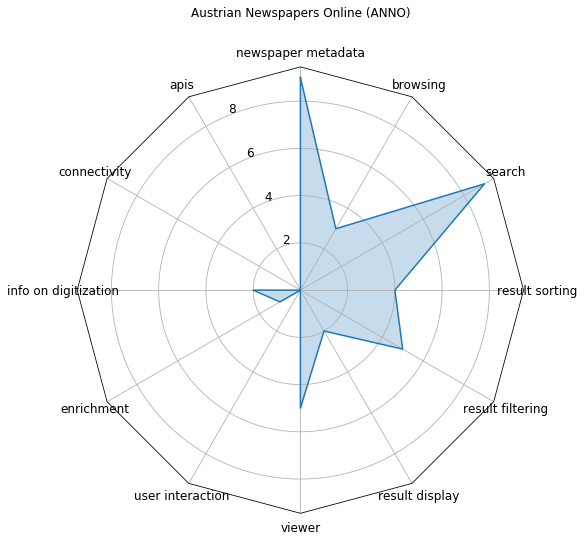

In [21]:
build_single_radar(labels, values=first_interface, title=level_0.columns[0], grid=[2,4,6,8], figure_title='Anno')

#### Radar view for each interface in one figure

In [22]:
# same with percentages
level_0_percent = base.groupby(level=0).sum(axis=1).apply(lambda x: 100*x/float(x.sum()))

# re-order index
level_0_percent = level_0_percent.reindex(["newspaper metadata", 
                 "apis",
                 "connectivity",
                 "info on digitization",
                 "enrichment",
                 "user interaction",
                 "viewer",
                 "result display",
                 "result filtering",
                 "result sorting",
                 "search",
                 "browsing"
                    ])

In [23]:
level_0_percent.iloc[:12, 11].index

Index(['newspaper metadata', 'apis', 'connectivity', 'info on digitization',
       'enrichment', 'user interaction', 'viewer', 'result display',
       'result filtering', 'result sorting', 'search', 'browsing'],
      dtype='object')

In [24]:
# checking we have 100 everywhere
level_0_percent.sum()

Austrian Newspapers Online (ANNO)                  100.0
Ancestry                                           100.0
British Newspaper Archives                         100.0
California Digital Newspaper Collection (CDNC)     100.0
Chronicling America                                100.0
Colorado Historical Newspaper Collection (CHNC)    100.0
Delpher                                            100.0
DigiPress                                          100.0
DIFMOE                                             100.0
E-luxemburgensia                                   100.0
E-newspaperarchives                                100.0
Europeana Newspapers                               100.0
L'Express                                          100.0
Gallica                                            100.0
Georgia Historic Newspapers                        100.0
Libraria - Ukrainian online periodicals archive    100.0
New York Times                                     100.0
POLONA                         

In [25]:
level_0_percent.max().max()

31.818181818181817

In [26]:
level_0_percent.iloc[:12, :24]

Austrian Newspapers Online (ANNO)   Ancestry  \
newspaper metadata                                 22.5   9.677419   
apis                                                0.0   0.000000   
connectivity                                        0.0   0.000000   
info on digitization                                5.0   0.000000   
enrichment                                          2.5   0.000000   
user interaction                                    0.0  12.903226   
viewer                                             12.5   9.677419   
result display                                      5.0  12.903226   
result filtering                                   12.5  12.903226   
result sorting                                     10.0   9.677419   
search                                             22.5  22.580645   
browsing                                            7.5   9.677419   

                      British Newspaper Archives  \
newspaper metadata                     14.705882   
apis                                    0.000000   
connectivity                            0.000000   
info on digitization                    8.823529   
enrichment                              0.000000   
user interaction                       14.705882   
viewer                                 14.705882   
result display                          8.823529   
result filtering                       14.705882   
result sorting                          5.882353   
search                                 11.764706   
browsing                                5.882353   

                      California Digital Newspaper Collection (CDNC)  \
newspaper metadata                                         12.500000   
apis                                                        0.000000   
connectivity                                                0.000000   
info on digitization                                        4.166667   
enrichment                                                  2.083333   
user interaction                                           14.583333   
viewer                                                     10.416667   
result display                                              6.250000   
result filtering                                           16.666667   
result sorting                                             10.416667   
search                                                     14.583333   
browsing                                                    8.333333   

                      Chronicling America  \
newspaper metadata              31.578947   
apis                             2.631579   
connectivity                     5.263158   
info on digitization             7.894737   
enrichment                       0.000000   
user interaction                 5.263158   
viewer                          13.157895   
result display                   2.631579   
result filtering                 5.263158   
result sorting                   7.894737   
search                          15.789474   
browsing                         2.631579   

                      Colorado Historical Newspaper Collection (CHNC)  \
newspaper metadata                                                5.0   
apis                                                              0.0   
connectivity                                                      0.0   
info on digitization                                              2.5   
enrichment                                                        2.5   
user interaction                                                 12.5   
viewer                                                           15.0   
result display                                                    7.5   
result filtering                                                 17.5   
result sorting                                                   12.5   
search                                                           17.5   
browsing                           

In [27]:
all_interfaces_percents = level_0_percent.iloc[:12, :24].T.values

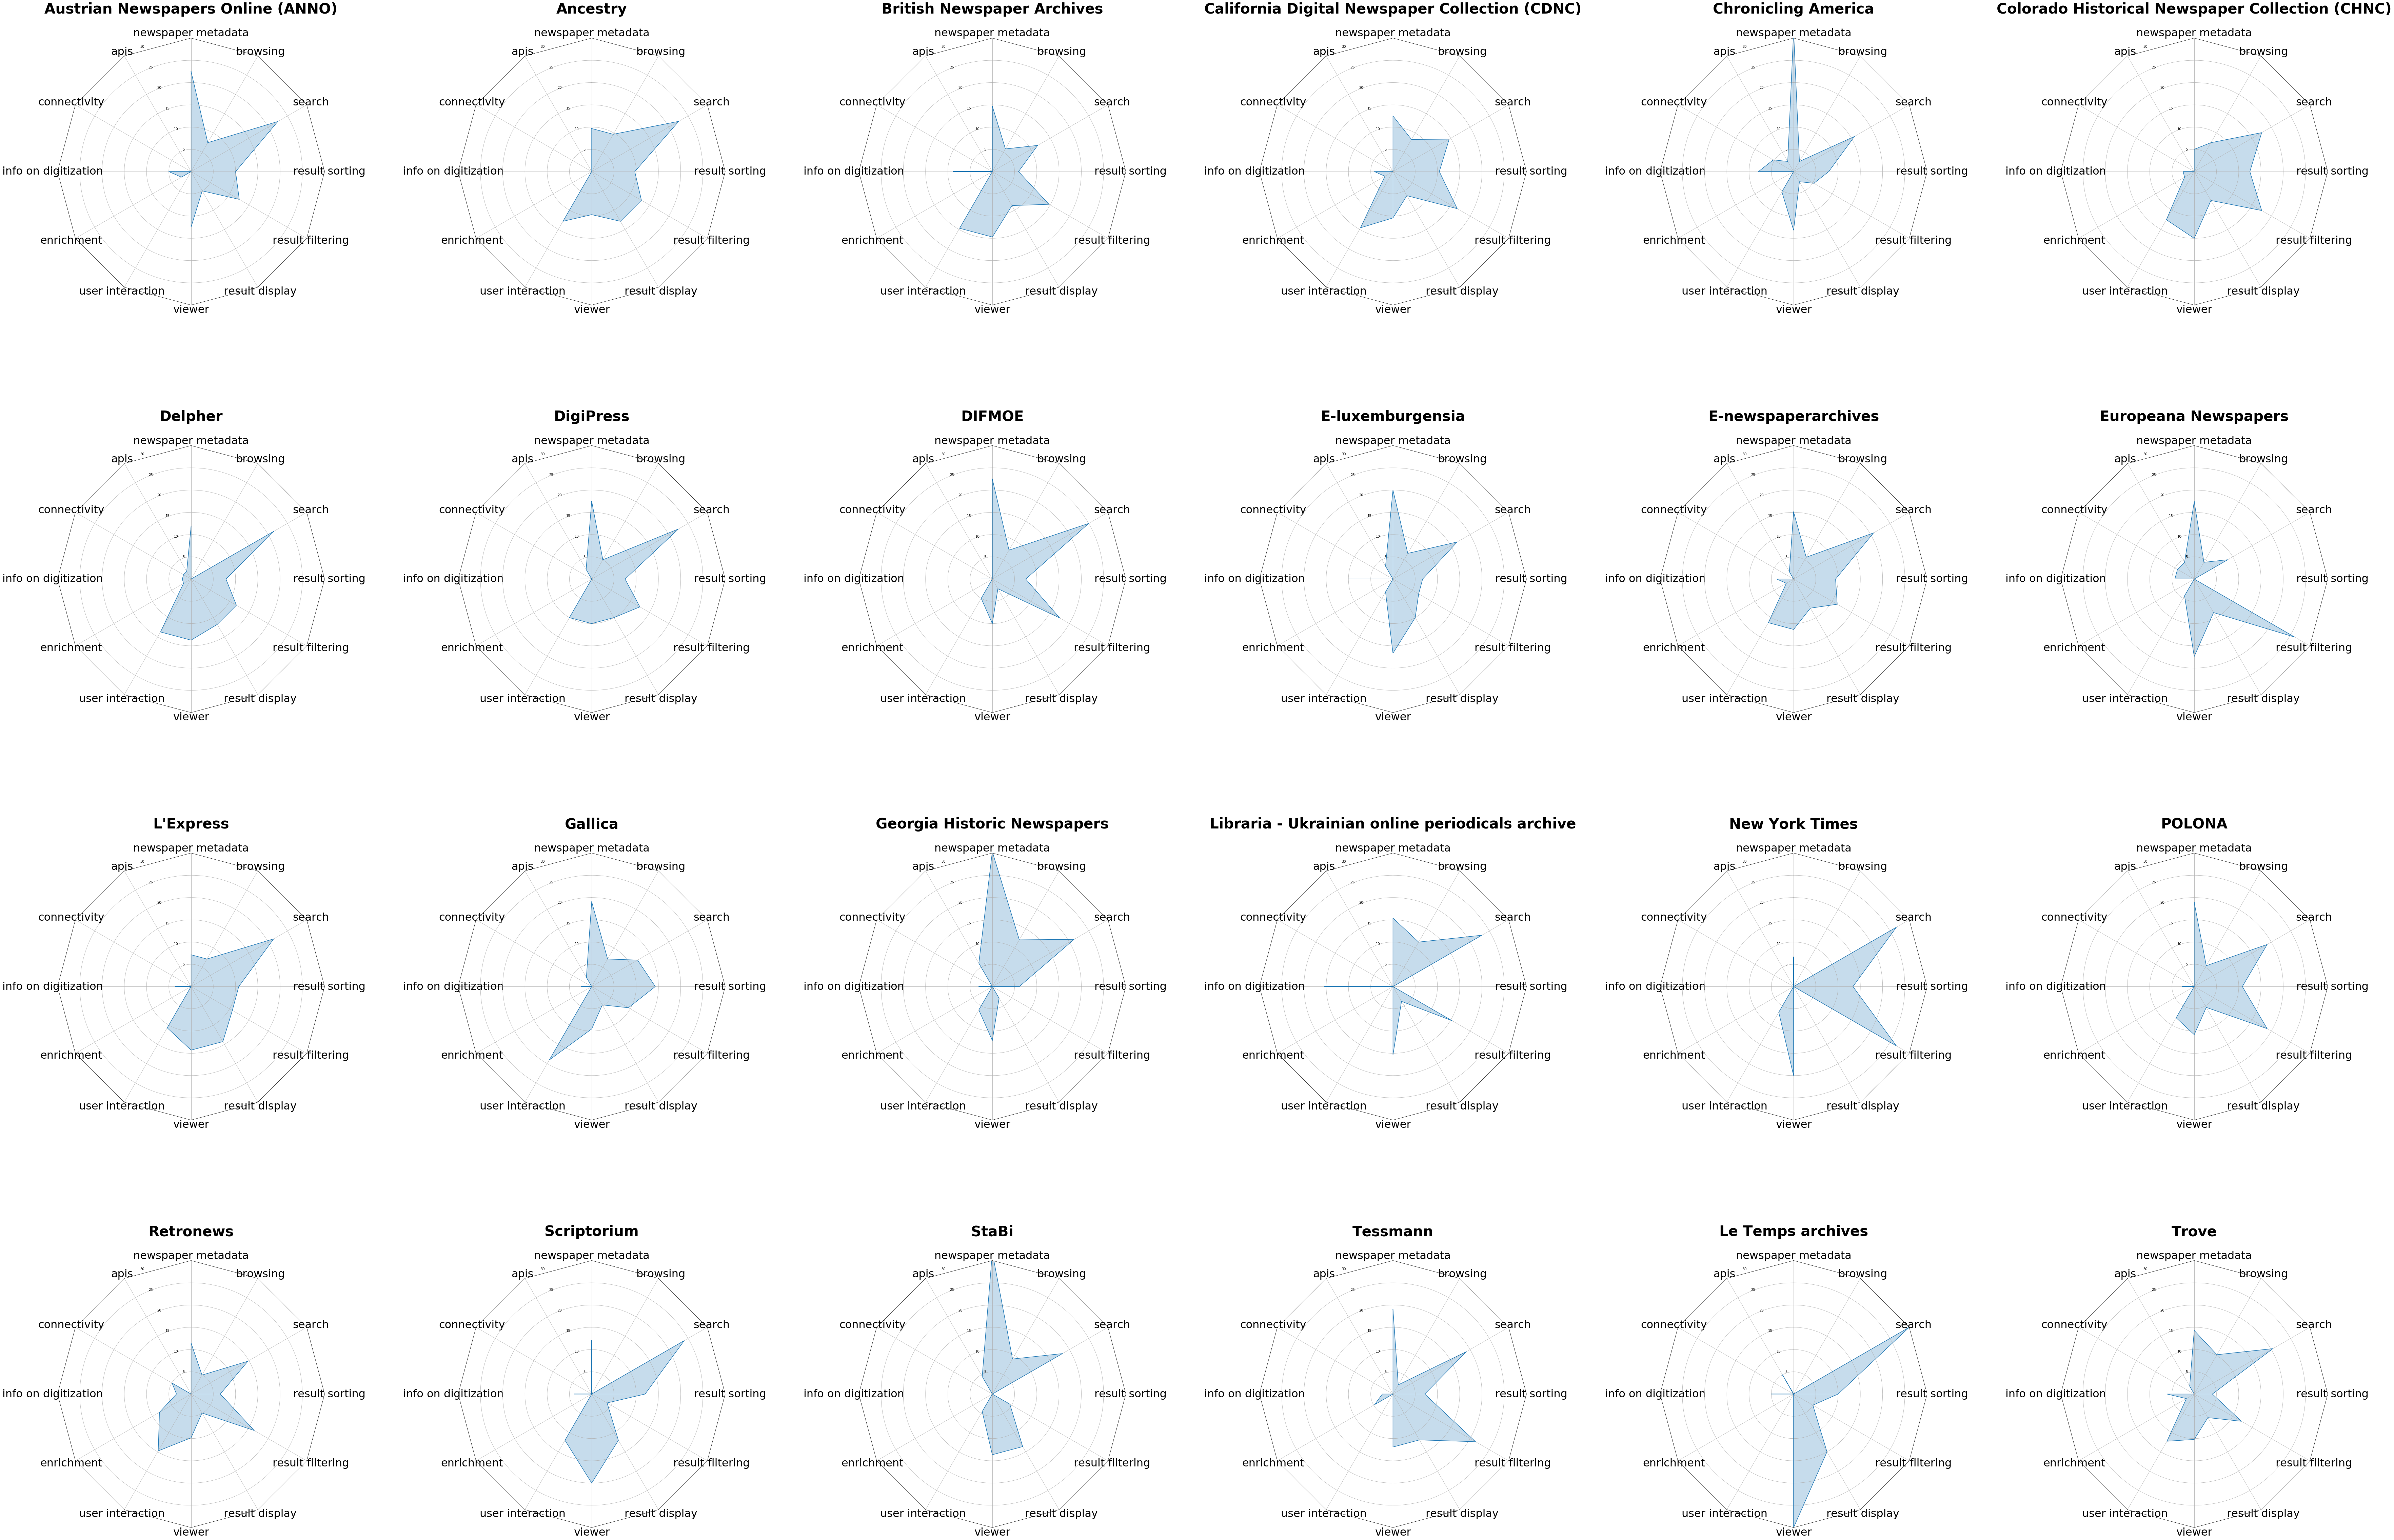

In [28]:
build_multiple_radar(labels, all_interfaces_percents, level_0.columns[:24], 'all-interfaces-single')

#### Global radar view (i.e. for all interfaces) over all features

In [29]:
level_0.iloc[:,25:]

Total (%)
newspaper metadata    16.244240
apis                   1.382488
connectivity           0.806452
info on digitization   4.147465
enrichment             1.497696
user interaction       9.216590
viewer                12.903226
result display         7.603687
result filtering      13.018433
result sorting         8.064516
search                19.124424
browsing               5.990783

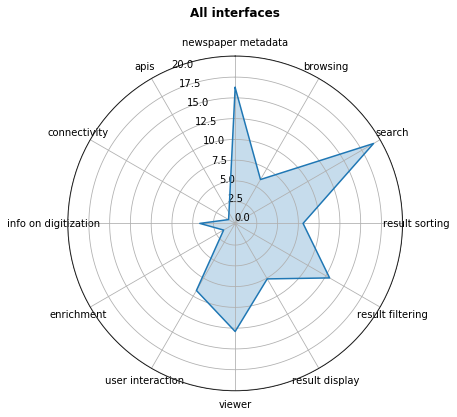

In [30]:
# take only the last column: Total per feature family, in percent
values = level_0.iloc[:,25:].T.values
build_single_radar_free(labels, values, "All interfaces",figure_title='all-interfaces-global')

#### Metadata (global)

In [31]:
metadata = base.loc['newspaper metadata'].copy()
metadata.loc[:,'Total'] = metadata.sum(axis=1)
#metadata['Total (%)'] = metadata['Total']/metadata['Total'].sum() * 100
metadata['Total (%)'] = metadata['Total']/24 * 100
metadata.loc[:,'Total']

Alternative titles              29.612903
Place of publication            40.188940
Geographic coverage             21.152074
Publisher                       27.497696
Date range                      48.649770
Periodicity                     21.152074
ISSN, OCLC, LCCN                 6.345622
External links                  10.576037
Historical description          27.497696
Language                        19.036866
Calendar view of issues         23.267281
Indication of archive holder    23.267281
Name: Total, dtype: float64

In [32]:
metadata.shape[0]

12

In [33]:
metadata['Total']

Alternative titles              29.612903
Place of publication            40.188940
Geographic coverage             21.152074
Publisher                       27.497696
Date range                      48.649770
Periodicity                     21.152074
ISSN, OCLC, LCCN                 6.345622
External links                  10.576037
Historical description          27.497696
Language                        19.036866
Calendar view of issues         23.267281
Indication of archive holder    23.267281
Name: Total, dtype: float64

In [34]:
metadata.sort_values('Total (%)').loc[:, 'Total (%)']

ISSN, OCLC, LCCN                 26.440092
External links                   44.066820
Language                         79.320276
Geographic coverage              88.133641
Periodicity                      88.133641
Calendar view of issues          96.947005
Indication of archive holder     96.947005
Publisher                       114.573733
Historical description          114.573733
Alternative titles              123.387097
Place of publication            167.453917
Date range                      202.707373
Name: Total (%), dtype: float64

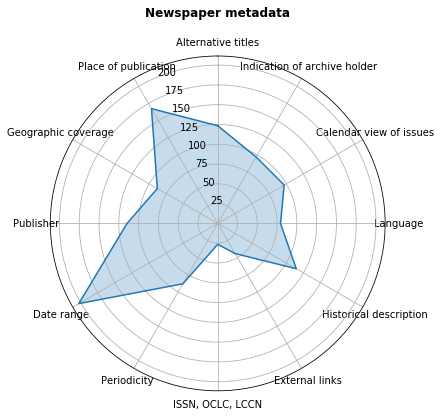

In [35]:
values_metadata = metadata.iloc[:,25:].T.values
build_single_radar_free(metadata.index, values_metadata, title="Newspaper metadata", figure_title="metadata-global")

#### Browsing

In [36]:
browsing = base.loc['browsing'].copy()
browsing.loc[:,'Total'] = browsing.sum(axis=1)
browsing['Total (%)'] = browsing['Total']/24 * 100
browsing.loc[:,'Total']

By date                             29.612903
By title                            40.188940
By place of publication             25.382488
By user tag                          4.230415
By newspaper thematic (metadata)    10.576037
Name: Total, dtype: float64

In [37]:
browsing.shape[0]

5

In [38]:
browsing.sort_values('Total (%)').loc[:, 'Total (%)']

By user tag                          17.626728
By newspaper thematic (metadata)     44.066820
By place of publication             105.760369
By date                             123.387097
By title                            167.453917
Name: Total (%), dtype: float64

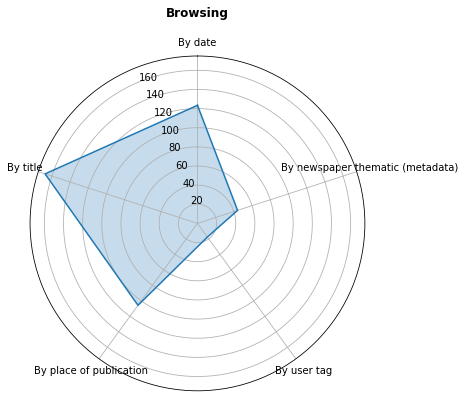

In [39]:
values_browsing = browsing.iloc[:,25:].T.values
build_single_radar_free(browsing.index, values_browsing, title="Browsing", figure_title="browsing-global")

#### Search

In [40]:
search = base.loc['search'].copy()
search.loc[:,'Total'] = search.sum(axis=1)
search['Total (%)'] = search['Total']/24 * 100
search['Total']

Keyword search                          50.764977
Query autocomplete                      10.576037
Boolean operators                       44.419355
Phrase search                           29.612903
Fuzzy search                            14.806452
Wild card                               14.806452
Proximity search                        10.576037
Limit by date range                     46.534562
Limit by language                       10.576037
Limit by NP title(s)                    33.843318
Limit by place of publication           25.382488
Limit by NP thematic (from metadata)     8.460829
Limit by NP segments                    23.267281
Limit by article category                4.230415
Limit by article length                  2.115207
Limit by archival holder                 8.460829
Limit by license                         8.460829
Query suggestion                         2.115207
Search by NE                             2.115207
Name: Total, dtype: float64

In [41]:
search.shape[0]

19

In [42]:
search.sort_values('Total (%)').loc[:, 'Total (%)']

Search by NE                              8.813364
Query suggestion                          8.813364
Limit by article length                   8.813364
Limit by article category                17.626728
Limit by license                         35.253456
Limit by archival holder                 35.253456
Limit by NP thematic (from metadata)     35.253456
Query autocomplete                       44.066820
Proximity search                         44.066820
Limit by language                        44.066820
Fuzzy search                             61.693548
Wild card                                61.693548
Limit by NP segments                     96.947005
Limit by place of publication           105.760369
Phrase search                           123.387097
Limit by NP title(s)                    141.013825
Boolean operators                       185.080645
Limit by date range                     193.894009
Keyword search                          211.520737
Name: Total (%), dtype: float64

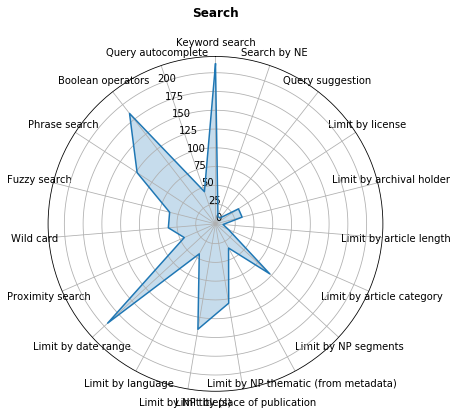

In [43]:
values_search = search.iloc[:,25:].T.values
build_single_radar_free(search.index, values_search, title="Search", figure_title="search-global")

#### Result display

In [44]:
rd = base.loc['result display'].copy()
rd.loc[:,'Total'] = rd.sum(axis=1)
rd['Total (%)'] = rd['Total']/24 * 100
rd['Total']

Distribution over time                     16.921659
Distribution by publication place           2.115207
Distribution by NP                         10.576037
Distribution by place names in articles     2.115207
Snippet preview                            42.304147
Search highlight in facsimiles             40.188940
Search highlight in text                   19.036866
Ngrams                                      6.345622
Name: Total, dtype: float64

In [45]:
rd.shape[0]

8

In [46]:
rd.sort_values('Total (%)').loc[:, 'Total (%)']

Distribution by publication place            8.813364
Distribution by place names in articles      8.813364
Ngrams                                      26.440092
Distribution by NP                          44.066820
Distribution over time                      70.506912
Search highlight in text                    79.320276
Search highlight in facsimiles             167.453917
Snippet preview                            176.267281
Name: Total (%), dtype: float64

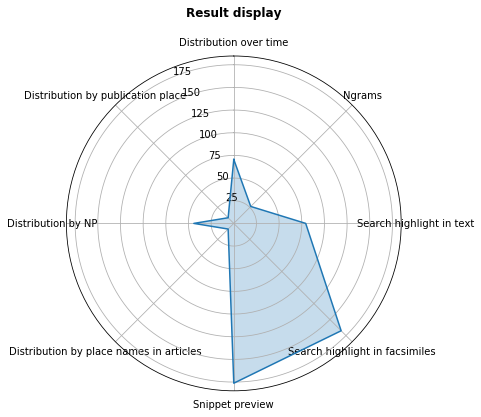

In [47]:
values_rd = rd.iloc[:,25:].T.values
build_single_radar_free(rd.index, values_rd, title="Result display", figure_title="result-display-global")

#### Result filtering

In [48]:
rf = base.loc['result filtering'].copy()
rf.loc[:,'Total'] = rf.sum(axis=1)
rf['Total (%)'] = rf['Total']/24 * 100
rf['Total']

By NP titles                        33.843318
By periodicity                       4.230415
By NP orientation                    2.115207
By newspaper thematic (metadata)    12.691244
By content types                    14.806452
By sections                          6.345622
By events                            2.115207
By persons                           6.345622
By organisations                     8.460829
By places mentioned in text          6.345622
By time period                      42.304147
By topics                            2.115207
By manual tags                       4.230415
By publication place                29.612903
By archive                           8.460829
By publisher                        10.576037
By article length                    8.460829
By authors                           8.460829
By segmentation level                2.115207
By language                         12.691244
By license                           6.345622
By online pub. date               

In [49]:
rf.shape[0]

22

In [50]:
rf.sort_values('Total (%)').loc[:, 'Total (%)']

By NP orientation                     8.813364
By topics                             8.813364
By events                             8.813364
By segmentation level                 8.813364
By periodicity                       17.626728
By manual tags                       17.626728
By online pub. date                  26.440092
By license                           26.440092
By places mentioned in text          26.440092
By persons                           26.440092
By sections                          26.440092
By archive                           35.253456
By article length                    35.253456
By authors                           35.253456
By organisations                     35.253456
By publisher                         44.066820
By newspaper thematic (metadata)     52.880184
By language                          52.880184
By content types                     61.693548
By publication place                123.387097
By NP titles                        141.013825
By time perio

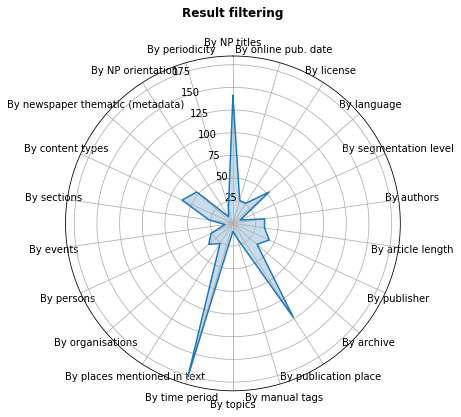

In [51]:
values_rf = rf.iloc[:,25:].T.values
build_single_radar_free(rf.index, values_rf, title="Result filtering", figure_title="result-filtering-global")

#### Result sorting

In [52]:
rs = base.loc['result sorting'].copy()
rs.loc[:,'Total'] = rs.sum(axis=1)
rs['Total (%)'] = rs['Total']/24 * 100
rs['Total']

By relevance           44.419355
By date                44.419355
By NP title            23.267281
By article title        8.460829
By content type         8.460829
By online pub. date    10.576037
By author               4.230415
By quality of text      2.115207
By language             0.000000
By popularity           2.115207
Name: Total, dtype: float64

In [53]:
rs.shape[0]

10

In [54]:
rs.sort_values('Total (%)').loc[:, 'Total (%)']

By language              0.000000
By quality of text       8.813364
By popularity            8.813364
By author               17.626728
By article title        35.253456
By content type         35.253456
By online pub. date     44.066820
By NP title             96.947005
By relevance           185.080645
By date                185.080645
Name: Total (%), dtype: float64

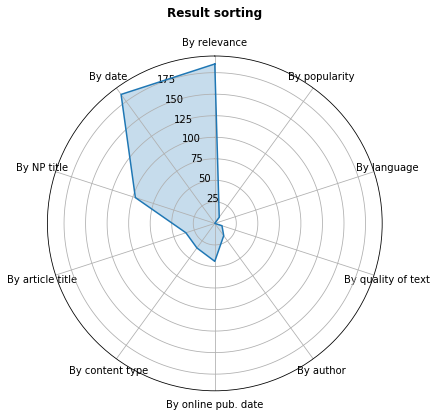

In [55]:
values_rs = rs.iloc[:,25:].T.values
build_single_radar_free(rs.index, values_rs, title="Result sorting", figure_title="result-sorting-global")

#### Viewer

In [56]:
viewer = base.loc['viewer'].copy()
viewer.loc[:,'Total'] = viewer.sum(axis=1)
viewer['Total (%)'] = viewer['Total']/24 * 100
viewer.loc[:,'Total']

Facsimile displayed                  50.764977
OCRed text display                   38.073733
Show full page                       35.958525
Interactive mini-map                 10.576037
Overview of avail. issues            21.152074
Search in viewed page                14.806452
Option to continue to next page      50.764977
Option to continue to next result    14.806452
Name: Total, dtype: float64

In [57]:
viewer.shape[0]

8

In [58]:
viewer.sort_values('Total (%)').loc[:, 'Total (%)']

Interactive mini-map                  44.066820
Search in viewed page                 61.693548
Option to continue to next result     61.693548
Overview of avail. issues             88.133641
Show full page                       149.827189
OCRed text display                   158.640553
Facsimile displayed                  211.520737
Option to continue to next page      211.520737
Name: Total (%), dtype: float64

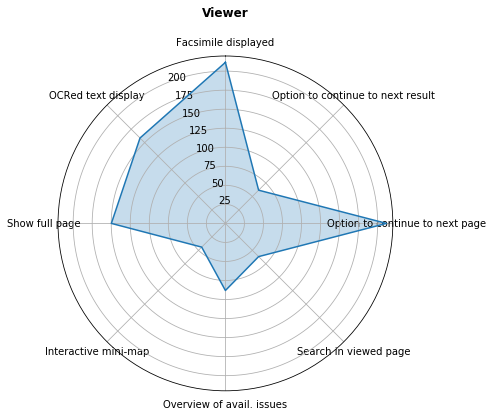

In [59]:
values_viewer = viewer.iloc[:,25:].T.values
build_single_radar_free(viewer.index, values_viewer, title="Viewer", figure_title="viewer-global")

#### Info on digitization

In [60]:
info = base.loc['info on digitization'].copy()
info.loc[:,'Total'] = info.sum(axis=1)
info['Total (%)'] = info['Total']/24 * 100
info.loc[:,'Total']

OLR at article level                19.036866
OCR confidence scores                0.000000
OLR confidence scores                0.000000
Documentation of biases              4.230415
Search result relevance score        0.000000
Digitisation date at title level     2.115207
Scan resolution                      4.230415
Used OCR tools                       2.115207
Copyright notice                    33.843318
Documentation of scan methods       10.576037
Name: Total, dtype: float64

In [61]:
info.shape[0]

10

In [62]:
info.sort_values('Total (%)').loc[:, 'Total (%)']

OCR confidence scores                 0.000000
OLR confidence scores                 0.000000
Search result relevance score         0.000000
Digitisation date at title level      8.813364
Used OCR tools                        8.813364
Documentation of biases              17.626728
Scan resolution                      17.626728
Documentation of scan methods        44.066820
OLR at article level                 79.320276
Copyright notice                    141.013825
Name: Total (%), dtype: float64

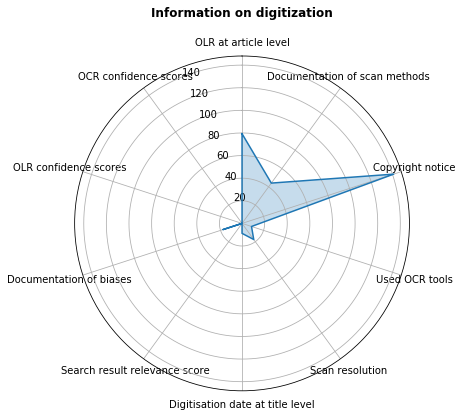

In [63]:
values_info = info.iloc[:,25:].T.values
build_single_radar_free(info.index, values_info, title="Information on digitization", figure_title="info-global")

#### User interaction 

In [64]:
user = base.loc['user interaction'].copy()
user.loc[:,'Total'] = user.sum(axis=1)
user['Total (%)'] = user['Total']/24 * 100
user['Total']

Save articles to favorites          23.267281
Save queries to favorites           12.691244
Tag articles                        14.806452
Keep track of viewed materials       6.345622
Article recommendations              0.000000
Permalinks                          25.382488
Export citation                     14.806452
Option to correct OCR               12.691244
Option to correct OLR                0.000000
Add/edit of metadata                 2.115207
Screenshot tool                     19.036866
Bulk downloads                      14.806452
Organise articles in collections    21.152074
Contrastive view of collections      2.115207
Name: Total, dtype: float64

In [65]:
user.shape[0]

14

In [66]:
user.sort_values('Total (%)').loc[:, 'Total (%)']

Article recommendations               0.000000
Option to correct OLR                 0.000000
Add/edit of metadata                  8.813364
Contrastive view of collections       8.813364
Keep track of viewed materials       26.440092
Save queries to favorites            52.880184
Option to correct OCR                52.880184
Tag articles                         61.693548
Export citation                      61.693548
Bulk downloads                       61.693548
Screenshot tool                      79.320276
Organise articles in collections     88.133641
Save articles to favorites           96.947005
Permalinks                          105.760369
Name: Total (%), dtype: float64

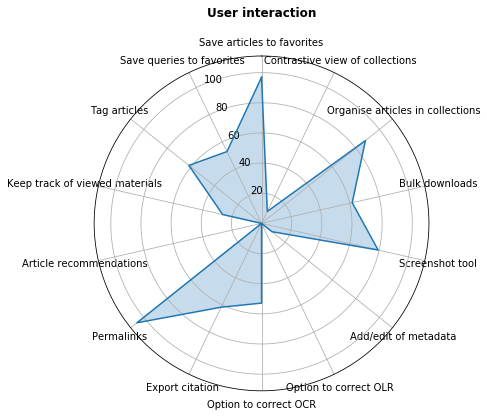

In [67]:
values_user = user.iloc[:,25:].T.values
build_single_radar_free(user.index, values_user, title="User interaction", figure_title="user-global")

#### Enrichment

In [68]:
enrich = base.loc['enrichment'].copy()
enrich = enrich.drop('Query')
enrich.loc[:,'Total'] = enrich.sum(axis=1)
enrich['Total (%)'] = enrich['Total']/24 * 100
enrich['Total']

NERC                                 4.230415
Entity linking                       4.230415
Automatic post-OCR correction        4.230415
Crowd-sourced post-OCR correction    8.460829
Topic Modeling                       2.115207
Text re-use                          0.000000
Sentiment Analysis                   0.000000
Recommendations                      2.115207
Event detection                      2.115207
Name: Total, dtype: float64

In [69]:
enrich.sort_values('Total (%)').loc[:, 'Total (%)']

Text re-use                           0.000000
Sentiment Analysis                    0.000000
Topic Modeling                        8.813364
Recommendations                       8.813364
Event detection                       8.813364
NERC                                 17.626728
Entity linking                       17.626728
Automatic post-OCR correction        17.626728
Crowd-sourced post-OCR correction    35.253456
Name: Total (%), dtype: float64

In [70]:
enrich.iloc[:,25:]

Total (%)
NERC                               17.626728
Entity linking                     17.626728
Automatic post-OCR correction      17.626728
Crowd-sourced post-OCR correction  35.253456
Topic Modeling                      8.813364
Text re-use                         0.000000
Sentiment Analysis                  0.000000
Recommendations                     8.813364
Event detection                     8.813364

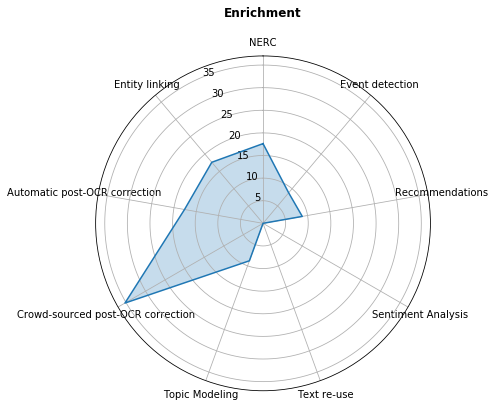

In [71]:
values_enrich = enrich.iloc[:,25:].T.values
build_single_radar_free(enrich.index, values_enrich, title="Enrichment", figure_title="enrichment-global")

#### Connectivity

In [72]:
conn = base.loc['connectivity'].copy()
conn.loc[:,'Total'] = conn.sum(axis=1)
conn['Total (%)'] = conn['Total']/24 * 100
conn['Total']

Third party identifiers        2.115207
Links to other repositories    8.460829
SW technologies                4.230415
Name: Total, dtype: float64

In [73]:
conn.shape[0]

3

In [74]:
conn.sort_values('Total (%)').loc[:, 'Total (%)']

Third party identifiers         8.813364
SW technologies                17.626728
Links to other repositories    35.253456
Name: Total (%), dtype: float64

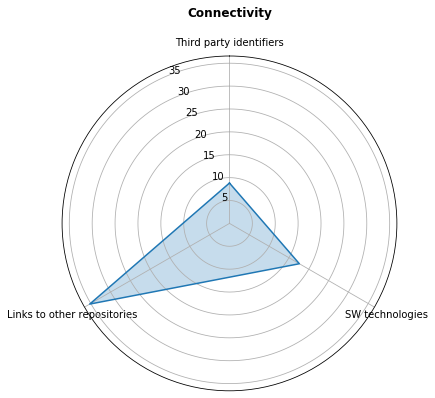

In [75]:
values_conn = conn.iloc[:,25:].T.values
build_single_radar_free(conn.index, values_conn, title="Connectivity", figure_title="connectivity-global")

#### APIs

In [76]:
apis = base.loc['apis'].copy()
apis.loc[:,'Total'] = apis.sum(axis=1)
apis['Total (%)'] = apis['Total']/24 * 100
apis['Total']

Link to source code of the interface     0.000000
API                                     10.576037
IIIF Image API                          14.806452
IIIF Presentation API                    0.000000
Name: Total, dtype: float64

In [77]:
apis.shape[0]

4

In [78]:
apis.sort_values('Total (%)').loc[:, 'Total (%)']

Link to source code of the interface     0.000000
IIIF Presentation API                    0.000000
API                                     44.066820
IIIF Image API                          61.693548
Name: Total (%), dtype: float64

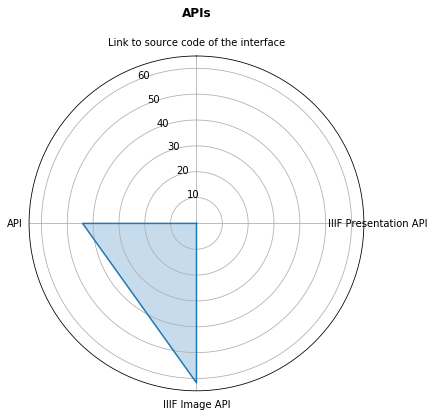

In [79]:
values_apis = apis.iloc[:,25:].T.values
build_single_radar_free(apis.index, values_apis, title="APIs", figure_title="apis-global")

#### Mapping

In [80]:
base_mapping = pd.read_csv("../data/InterfaceReview-5June2019-mapping.tsv", sep="\t", index_col= [0,1,2], skipinitialspace=True)

In [81]:
# trim
base_mapping = trim_all_columns(base_mapping)

base_mapping = base_mapping.drop('Other', level=2)
base_mapping = base_mapping.drop('Download options (file formats)', level=2)

#Replace n and y by 0 and 1 (ideally to clean in spreadsheet)
base_mapping = base_mapping.replace(to_replace=['y', 'y?', 'y (annotations)', 'y (requires user account - free)', 'n', '?', 'u', 'n?', 'n (?)', 'n (but can signal mistakes)'], 
                    value=[1,1,1,1,0,0,0,0,0,0])

In [82]:
base_mapping.head()

Austrian Newspapers Online (ANNO)  \
- interface URL                                                      http://anno.onb.ac.at/   
            Target area                                      Austria (and former AH empire)   
            Creator                                             National library of Austria   
            Purpose and scope             Collection of historical newspaper and journal...   
            Approximate date of creation                                               2003   

                                                                                   Ancestry  \
- interface URL                                                 https://www.newspapers.com/   
            Target area                                                    US, UK, AUS, CAN   
            Creator                                                            Ancestry.com   
            Purpose and scope             Collection of EN-speaking newspapers, primary ...   
            Approximate date of creation                                                  0   

                                                          British Newspaper Archives  \
- interface URL                           https://www.britishnewspaperarchive.co.uk/   
            Target area                                                British isles   
            Creator                                                  British Library   
            Purpose and scope                       collection of British newspapers   
            Approximate date of creation                                           0   

                                             California Digital Newspaper Collection (CDNC)  \
- interface URL                                           https://cdnc.ucr.edu/cgi-bin/cdnc   
            Target area                                                      California, US   
            Creator                       California State Library, National Endowment f...   
            Purpose and scope             To digitize California newspapers for the Nati...   
            Approximate date of creation                                               2008   

                                                                        Chronicling America  \
- interface URL                                           http://chroniclingamerica.loc.gov   
            Target area                                                       United States   
            Creator                                                     Library of Congress   
            Purpose and scope             Collection of selected American newspapers dig...   
            Approximate date of creation                                                  0   

                                            Colorado Historical Newspaper Collection (CHNC)  \
- interface URL                                 https://www.coloradohistoricnewspapers.org/   
            Target area                                                        Colorado, US   
            Creator                       Colorado State Library, History Colorado, Coll...   
            Purpose and scope             The long-term goal for CHNC is to provide acce...   
            Approximate date of creation                                            ca 2005   

                                                                                    Delpher  \
- interface URL                                          https://www.delpher.nl/nl/kranten/   
            Target area                                  Netherland and its former colonies   
            Creator                                                     Royal Dutch Library   
            Purpose and scope             Access to digitized texts incl. books, journal...   
            Approximate date of creation                                            ongoing   

                                                                                  DigiPress  \
- interf

In [83]:
mapping = base_mapping.groupby(level=0).sum(axis=1)
mapping = mapping.drop('-')

In [84]:
mapping.loc[:,'Total'] = mapping.sum(axis=1)
mapping['Total (%)'] = mapping['Total']/mapping['Total'].sum() * 100

In [85]:
values = mapping.iloc[:,25:]
values

Total (%)
Connectivity                          1.261830
Content filtering                    19.242902
Content search                       29.547844
Generosity                            5.152471
Source criticism                     37.118822
User content management/exploration   7.676130

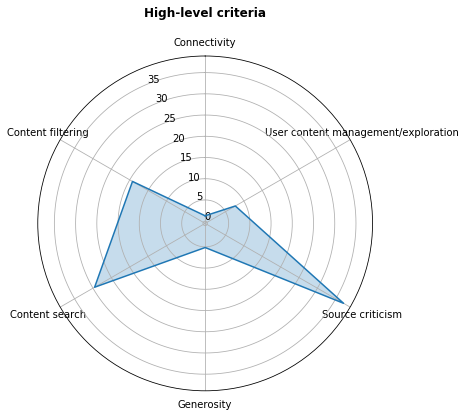

In [86]:
values = mapping.iloc[:,25:].T.values
build_single_radar_free(mapping.index, values, "High-level criteria",figure_title='high-level-criteria')